In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

from google.colab import files
uploaded = files.upload()

# Load the dataset
data = pd.read_csv('house price dataset.csv')

# Creating a binary target variable based on the median sale price
median_price = data['SalePrice'].median()
data['PriceCategory'] = (data['SalePrice'] > median_price).astype(int)  # 1 for high, 0 for low

# Selecting the features and the new binary target
X = data[['LotArea']]  # Using LotArea as an example feature
y = data['PriceCategory']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a DMatrix, which is an internal data structure that XGBoost uses to optimize memory usage and training speed
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Specifying parameters for the XGBoost model
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'logloss'  # Logarithmic loss
}

# Training the model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Making predictions (outputting probabilities)
y_pred_prob = bst.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)  # Converting probabilities to binary output

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the model's performance metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Saving house price dataset.csv to house price dataset.csv
Accuracy: 0.64
Confusion Matrix:
[[109  52]
 [ 52  79]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


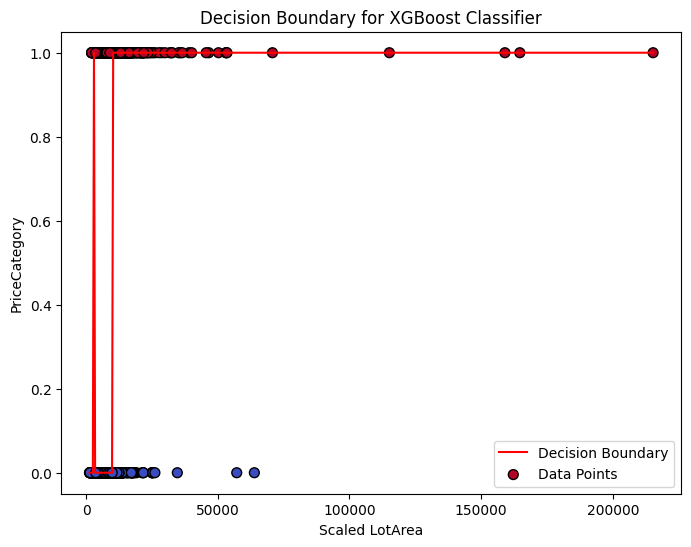

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, model, scaler):
    # Create a mesh grid for plotting decision boundary
    x_min, x_max = X.min() - 1, X.max() + 1
    xx = np.linspace(x_min, x_max, 500).reshape(-1, 1)

    # Transform the grid to the same scale as the training data
    xx_scaled = scaler.transform(xx)

    # Creating DMatrix for prediction
    dxx_scaled = xgb.DMatrix(xx_scaled)

    # Predict on the mesh grid
    Z_prob = model.predict(dxx_scaled)
    Z = (Z_prob > 0.5).astype(int)

    # Plot decision boundary and margin
    plt.figure(figsize=(8, 6))

    # Plot decision boundary by plotting `Z` with `xx`
    plt.plot(xx, Z, color='red', label='Decision Boundary')
    plt.scatter(X, y, c=y, cmap='coolwarm', edgecolor='k', s=50, label='Data Points')
    plt.xlabel('Scaled LotArea')
    plt.ylabel('PriceCategory')
    plt.title('Decision Boundary for XGBoost Classifier')
    plt.legend()
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X[['LotArea']], y, bst, scaler)